<div align="center">
    
# 2.0 Data Wrangling

## 2.1 Table of Contents<a id='2.1_Table_of_Contents'></a>
* [2.1 Table of Contents](#2.1_Table_of_Contents)
* [2.2 Introduction](#2.2_Introduction)
* [2.3 Library Imports](#2.3_Library_Imports)
* [2.4 Data Loading](#2.4_Data_Loading)
* [2.5 Data Inspection](#2.5_Data_Inspection)
  * [2.5.1 Numerical Features](#2.5.1_Numerical_Features)
  * [2.5.2 Categorical Features](#2.5.2_Categorical_Features)
* [2.6 Data Cleaning](#2.6_Data_Cleaning)
  * [2.6.1 Duplicates](#2.6.1_Duplicates)
  * [2.6.2 Missing Values](#2.6.2_Missing_Values)
  * [2.6.3 Outliers](#2.6.3_Outliers)
* [2.7 Data Transformation](#2.7_Data_Transformation)
* [2.8 Summary](#2.8_Summary)

## 2.2 Introduction<a id='2.2_Introduction'></a>

This project aims to provide **price recommendations for Big Mountain Resort** by analyzing ski-resort data across the United States. Through data cleaning, feature engineering, and predictive modeling, the goal is to identify key factors influencing ticket prices and support data-driven pricing decisions.

This notebook focuses on the **data-wrangling stage**, where the raw dataset is transformed into a clean, consistent, and analysis-ready form. Tasks include inspecting data types, handling missing values, correcting errors, removing duplicates, and standardizing column names. The cleaned dataset produced here will serve as the foundation for subsequent **exploratory data analysis (EDA)** and **model development**.

## 2.3 Library Imports<a id='2.3_Library_Imports'></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 2.4 Data Loading<a id='2.4_Data_Loading'></a>

In [2]:
# --- CSV file ---
df = pd.read_csv('../data/raw/ski_resort_data.csv')

In [3]:
# Preview
print(f"Shape: {df.shape}")
df.head()

Shape: (330, 27)


,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## 2.5 Data Inspection<a id='2.5_Data_Inspection'></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

### Note:
The ski resort dataset contains **330 entries** and **27 features**, each representing various characteristics of ski resorts across the United States.  
The data includes both **categorical** and **numerical** variables describing resort location, terrain size, elevation, lifts, snowfall, and pricing.

In [5]:
# Check target resort, 'Big Mountain Resort'.
df.loc[df['Name'] == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0.0
fastSixes,0
fastQuads,3


### Note:
1. The target resort, `Big Mountain Resort`, has no missing values.
2. `AdultWeekday` and `AdultWeekend` represent ski ticket prices, which are the target variables in this project.

### 2.5.1 Numerical Features<a id='2.5.1_Numerical_Features'></a>

In [6]:
# Summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,330,329,Crystal Mountain,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,330,38,New York,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,330,35,New York,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
summit_elev,330.0,NaN,NaN,NaN,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.0,13487.0
vertical_drop,330.0,NaN,NaN,NaN,1215.427273,947.864557,60.0,461.25,964.5,1800.0,4425.0
base_elev,330.0,NaN,NaN,NaN,3374.0,3117.121621,70.0,869.0,1561.5,6325.25,10800.0
trams,330.0,NaN,NaN,NaN,0.172727,0.559946,0.0,0.0,0.0,0.0,4.0
fastEight,164.0,NaN,NaN,NaN,0.006098,0.078087,0.0,0.0,0.0,0.0,1.0
fastSixes,330.0,NaN,NaN,NaN,0.184848,0.651685,0.0,0.0,0.0,0.0,6.0
fastQuads,330.0,NaN,NaN,NaN,1.018182,2.198294,0.0,0.0,0.0,1.0,15.0


### 2.5.2 Categorical Features<a id='2.5.2_Categorical_Features'></a>

In [7]:
# Check categorical features
df.select_dtypes(include=['object', 'category']).head()

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona


In [8]:
df_diff = df[df['Region'] != df['state']]
df_diff[['Name', 'Region', 'state']]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
5,Yosemite Ski & Snowboard Area,Northern California,California,7800,600,7200,0,0.0,0,0,...,0.4,88.0,NaN,110.0,84.0,300.0,47.0,47.0,107.0,NaN
6,Bear Mountain,Sierra Nevada,California,8805,1665,7140,0,0.0,0,2,...,1.5,198.0,198.0,122.0,76.0,100.0,NaN,NaN,130.0,NaN
7,Bear Valley,Sierra Nevada,California,8500,1900,6600,0,0.0,1,1,...,1.2,1680.0,100.0,165.0,52.0,359.0,NaN,NaN,151.0,NaN
8,Boreal Mountain Resort,Sierra Nevada,California,7700,500,7200,0,0.0,0,1,...,1.0,380.0,200.0,150.0,54.0,400.0,49.0,NaN,150.0,200.0
9,Dodge Ridge,Sierra Nevada,California,8200,1600,6600,0,0.0,0,0,...,2.0,862.0,NaN,NaN,69.0,350.0,78.0,78.0,140.0,NaN
10,Donner Ski Ranch,Sierra Nevada,California,8012,750,7031,0,0.0,0,0,...,1.5,505.0,60.0,163.0,82.0,400.0,75.0,75.0,170.0,NaN
11,Heavenly Mountain Resort,Sierra Nevada,California,10067,3500,7170,2,0.0,2,7,...,5.5,4800.0,3379.0,155.0,64.0,360.0,NaN,NaN,157.0,NaN
12,June Mountain,Sierra Nevada,California,10090,2590,7545,0,NaN,0,2,...,2.0,1500.0,NaN,NaN,58.0,250.0,NaN,NaN,128.0,NaN
13,Kirkwood,Sierra Nevada,California,9800,2000,7800,0,0.0,0,2,...,2.5,2300.0,200.0,200.0,47.0,354.0,NaN,NaN,167.0,NaN
14,Mammoth Mountain Ski Area,Sierra Nevada,California,11053,3100,7953,3,0.0,2,9,...,3.0,3500.0,700.0,243.0,66.0,400.0,149.0,159.0,NaN,NaN


### Note:
Among the 330 resorts, the values in `Region` and `state` are identical for most entries, while 33 of them are different. Therefore, both columns are retained for further analysis.

## 2.6 Data Cleaning<a id='2.6_Data_Cleaning'></a>

### 2.6.1 Duplicates<a id='2.6.1_Duplicates'></a>

In [9]:
# Check duplicate resort names
df.duplicated(subset=['Name']).sum()

np.int64(1)

In [10]:
df[df.duplicated(subset=['Name'], keep=False)]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


### Note:
Two resorts share the same name, `Crystal Mountain`, but are in different locations. There are no duplicate records.

### 2.6.2 Missing Values<a id='2.6.2_Missing_Values'></a>

In [11]:
# Check for missing values
df.isna().sum().sort_values(ascending=False)

fastEight            166
NightSkiing_ac       143
AdultWeekday          54
daysOpenLastYear      51
TerrainParks          51
AdultWeekend          51
projectedDaysOpen     47
Snow Making_ac        46
averageSnowfall       14
LongestRun_mi          5
Runs                   4
SkiableTerrain_ac      3
yearsOpen              1
quad                   0
fastQuads              0
vertical_drop          0
base_elev              0
summit_elev            0
state                  0
Name                   0
Region                 0
fastSixes              0
trams                  0
triple                 0
double                 0
surface                0
total_chairs           0
dtype: int64

In [12]:
## Count rows that have missing values in both 'AdultWeekday' and 'AdultWeekend'
both_missing = df[df['AdultWeekday'].isna() & df['AdultWeekend'].isna()]
print("Number of rows where both are missing:", len(both_missing))

Number of rows where both are missing: 47


In [13]:
# Remove rows with missing target values
df = df.dropna(subset=['AdultWeekday', 'AdultWeekend'])

### Note:
The `AdultWeekday` and `AdultWeekend` are the target variables. Rows with missing values in these fields are removed becasue they provide no target data for model training.

In [14]:
# Check value counts of 'fastEight' 
df['fastEight'].value_counts(dropna=False)

fastEight
NaN    139
0.0    133
Name: count, dtype: int64

In [15]:
# Remove the 'fastEight' column
df = df.drop(columns=['fastEight'])

### Note:
`fastEight` has 166 missing values, with 163 entries of 0.0 and only 1 of 1.0. The variable is removed due to minimal variability and low predictive value.

In [16]:
# Check value counts of 'NightSkiing_ac' 
df['NightSkiing_ac'].value_counts(dropna=False).sort_values(ascending=False)

NightSkiing_ac
NaN      113
100.0     15
35.0       9
30.0       7
50.0       7
        ... 
2.0        1
541.0      1
74.0       1
32.0       1
135.0      1
Name: count, Length: 71, dtype: int64

In [17]:
# Fill missing values of 'NightSkiing_ac', 'TerrainParks' and 'Snow Making_ac' with 0
df['NightSkiing_ac'] = df['NightSkiing_ac'].fillna(0)
df['TerrainParks'] = df['TerrainParks'].fillna(0)
df['Snow Making_ac'] = df['Snow Making_ac'].fillna(0)

### Note:
Missing values in `NightSkiing_ac`, `TerrainParks`, and `Snow Making_ac` are replaced with 0, assuming the resort lacks these facilities.

In [18]:
# Fill missing values using median within each region group
df['daysOpenLastYear'] = df.groupby('Region')['daysOpenLastYear'].transform(
    lambda x: x.fillna(x.median())
)
df['projectedDaysOpen'] = df.groupby('Region')['projectedDaysOpen'].transform(
    lambda x: x.fillna(x.median())
)
df['averageSnowfall'] = df.groupby('Region')['averageSnowfall'].transform(
    lambda x: x.fillna(x.median())
)

### Note:
Missing values in `daysOpenLastYear`, `projectedDaysOpen`, and `averageSnowfall` are filled using the median value within each region group, as these variables are region-dependent.

In [19]:
# Fill missing values using overall median
df['yearsOpen'] = df['yearsOpen'].fillna(df['yearsOpen'].median())
df['LongestRun_mi'] = df['LongestRun_mi'].fillna(df['LongestRun_mi'].median())
df['Runs'] = df['Runs'].fillna(df['Runs'].median())
df['SkiableTerrain_ac'] = df['SkiableTerrain_ac'].fillna(df['SkiableTerrain_ac'].median())

### Note:
Missing values in `yearsOpen`, `LongestRun_mi`, `Runs`, and `SkiableTerrain_ac` are filled using each column’s overall median.

In [20]:
# Re-check for missing values
df.isna().sum().sort_values(ascending=False)

Name                 0
Region               0
state                0
summit_elev          0
vertical_drop        0
base_elev            0
trams                0
fastSixes            0
fastQuads            0
quad                 0
triple               0
double               0
surface              0
total_chairs         0
Runs                 0
TerrainParks         0
LongestRun_mi        0
SkiableTerrain_ac    0
Snow Making_ac       0
daysOpenLastYear     0
yearsOpen            0
averageSnowfall      0
AdultWeekday         0
AdultWeekend         0
projectedDaysOpen    0
NightSkiing_ac       0
dtype: int64

### Note:
Missing values are addressed.

### 2.6.3 Outliers<a id='2.6.3_Outliers'></a>

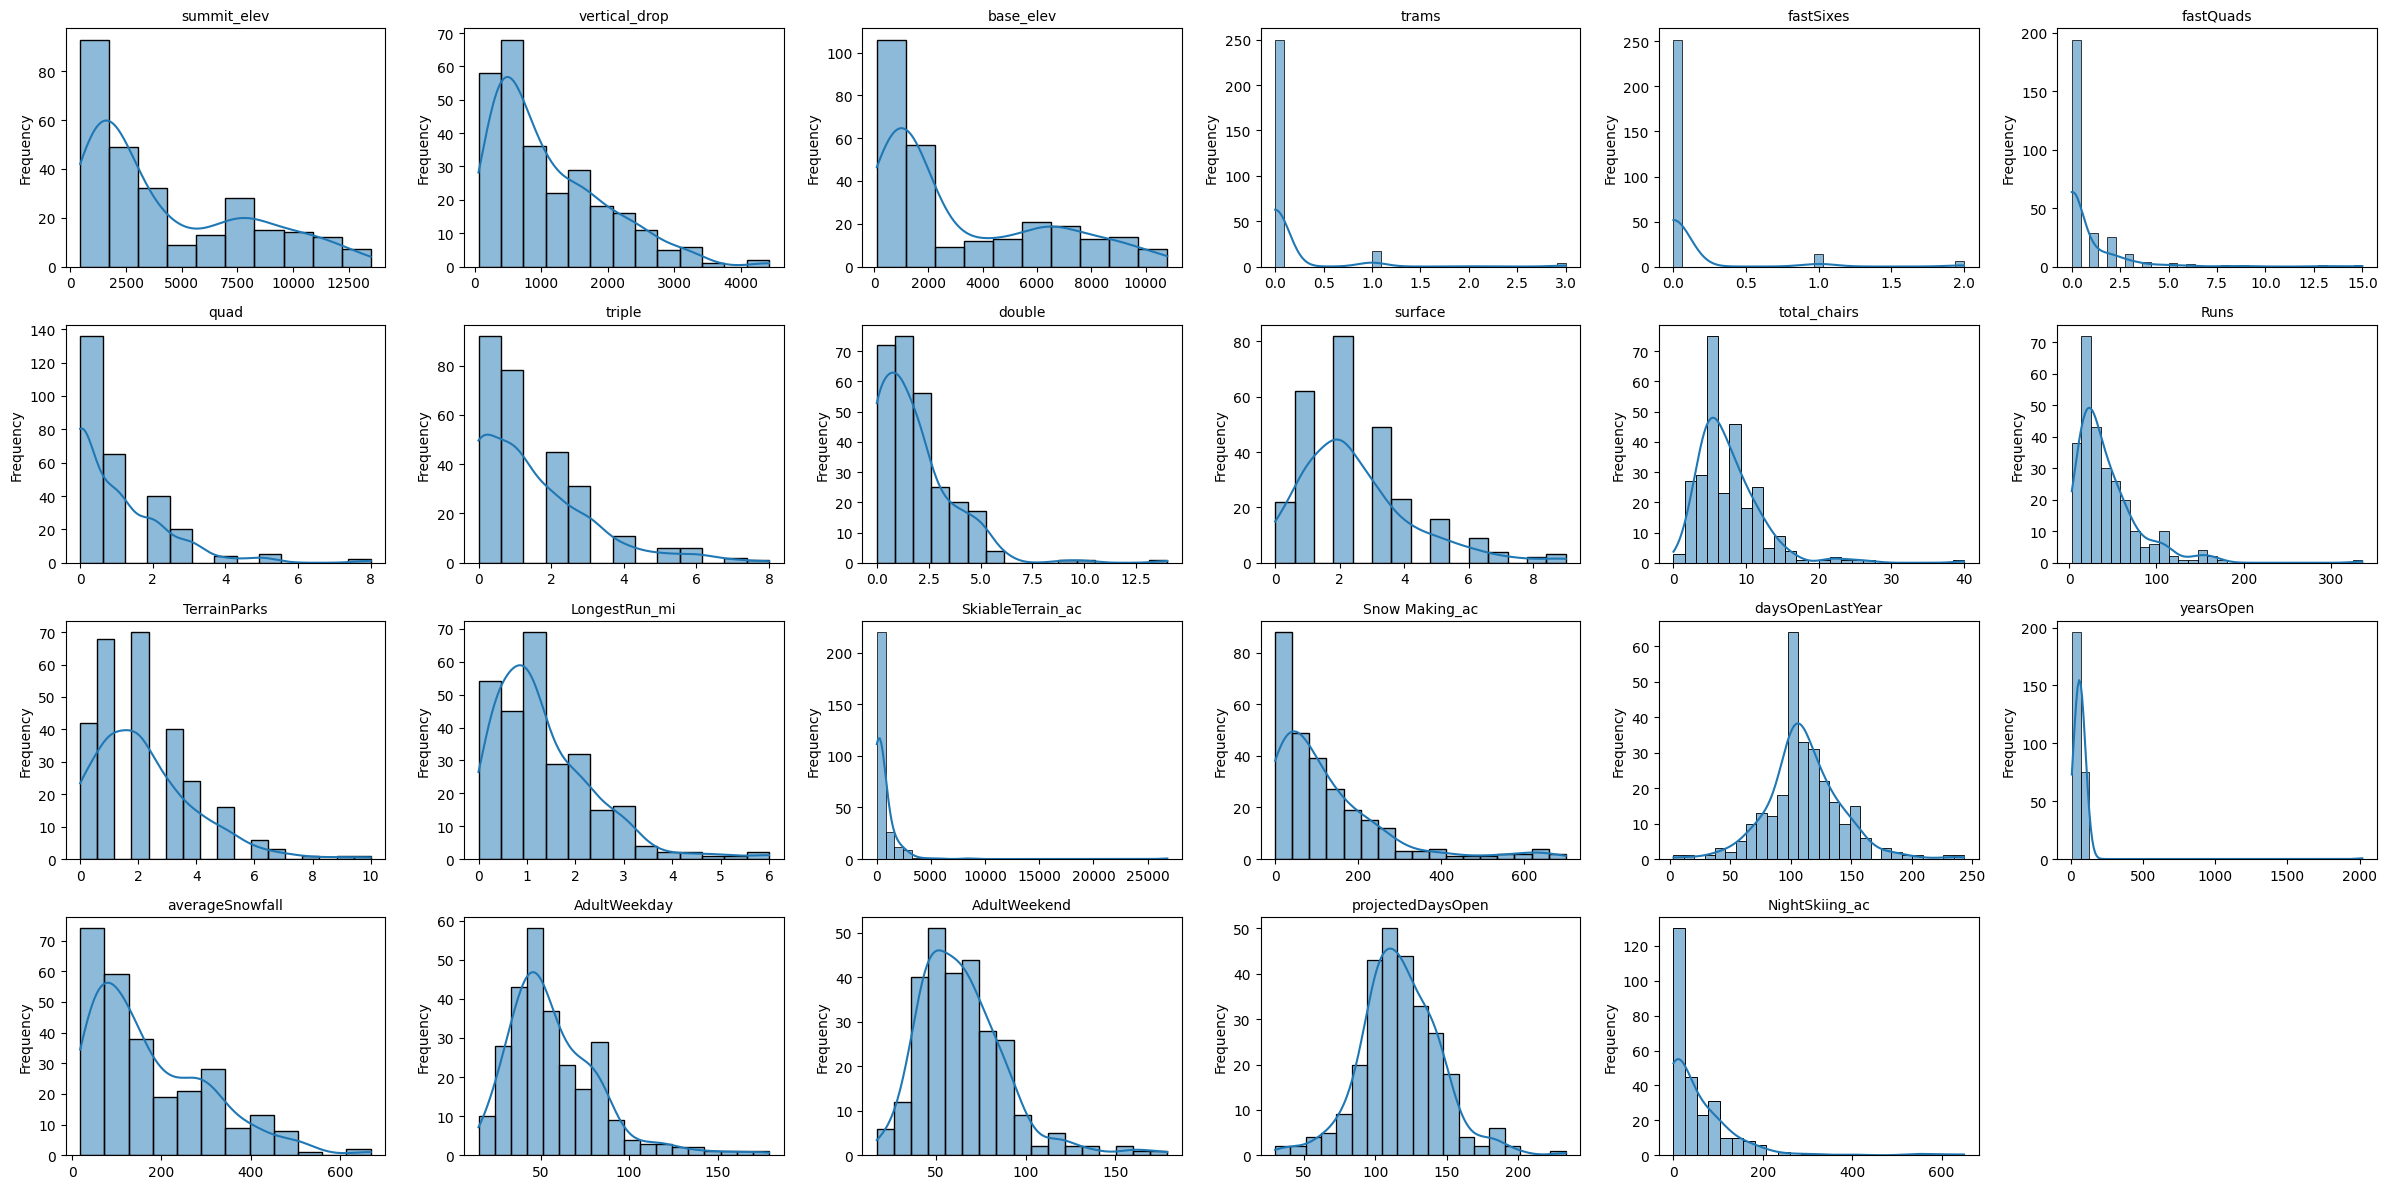

In [21]:
# Check distributions of each numerical variable

# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns

# --- Layout settings ---
cols_per_row = 6
n_cols = len(num_cols)
n_rows = math.ceil(n_cols / cols_per_row)

# --- Create subplots ---
fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(cols_per_row * 4, n_rows * 3))
axes = axes.flatten()

# --- Plot each numeric column ---
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# --- Hide empty subplots ---
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Note:
Some variables have relatively large values that are still within an acceptable range. However, `SkiableTerrain_ac` and `yearsOpen` show unreasonably high values, indicating potential outliers or data entry mistakes.

In [22]:
# Top 10 SkiableTerrain_ac
print("Top 10 SkiableTerrain_ac values:")
display(df[['Name', 'Region', 'SkiableTerrain_ac']].sort_values(
    by='SkiableTerrain_ac', ascending=False).head(10))

Top 10 SkiableTerrain_ac values:


,Name,Region,SkiableTerrain_ac
39,Silverton Mountain,Colorado,26819.0
267,Powder Mountain,Utah,8464.0
27,Aspen / Snowmass,Colorado,5517.0
231,Mt. Bachelor,Oregon,4318.0
14,Mammoth Mountain Ski Area,Sierra Nevada,3500.0
268,Snowbasin,Utah,3000.0
151,Big Mountain Resort,Montana,3000.0
60,Schweitzer,Idaho,2900.0
260,Alta Ski Area,Salt Lake City,2614.0
322,Grand Targhee Resort,Wyoming,2602.0


In [23]:
## Replace the value of 'SkiableTerrain_ac' for Silverton Mountain with 1819
df.loc[df['Name'] == 'Silverton Mountain', 'SkiableTerrain_ac'] = 1819

### Note:
The value of `SkiableTerrain_ac` = 26,819 is unreasonably high.
According to Wikipedia, Silverton Mountain has approximately 1,819 acres of skiable terrain.
Therefore, the value has been replaced with 1,819 acres.

In [24]:
# Top 10 yearsOpen
print("\nTop 10 yearsOpen values:")
display(df[['Name', 'Region', 'yearsOpen']].sort_values(
    by='yearsOpen', ascending=False).head(10))


Top 10 yearsOpen values:


,Name,Region,yearsOpen
115,Pine Knob Ski Resort,Michigan,2019.0
34,Howelsen Hill,Colorado,104.0
16,Mountain High,Sierra Nevada,95.0
249,Seven Springs,Pennsylvania,87.0
287,Suicide Six,Vermont,85.0
157,Black Mountain,New Hampshire,84.0
56,Lookout Pass Ski Area,Idaho,84.0
5,Yosemite Ski & Snowboard Area,Northern California,84.0
85,Blandford Ski Area,Massachusetts,83.0
75,Camden Snow Bowl,Maine,83.0


In [25]:
# Correct 'yearsOpen' for Pine Knob Ski Resort
df.loc[df['Name'] == 'Pine Knob Ski Resort', 'yearsOpen'] = 2025 - 1962  # opened in 1962

### Note:
The value of `yearsOpen` = 2019 for Pine Knob Ski Resort is unreasonably high.
According to Wikipedia, the resort opened in 1962.
Therefore, the `yearsOpen` value is corrected to 63 years (as of 2025).

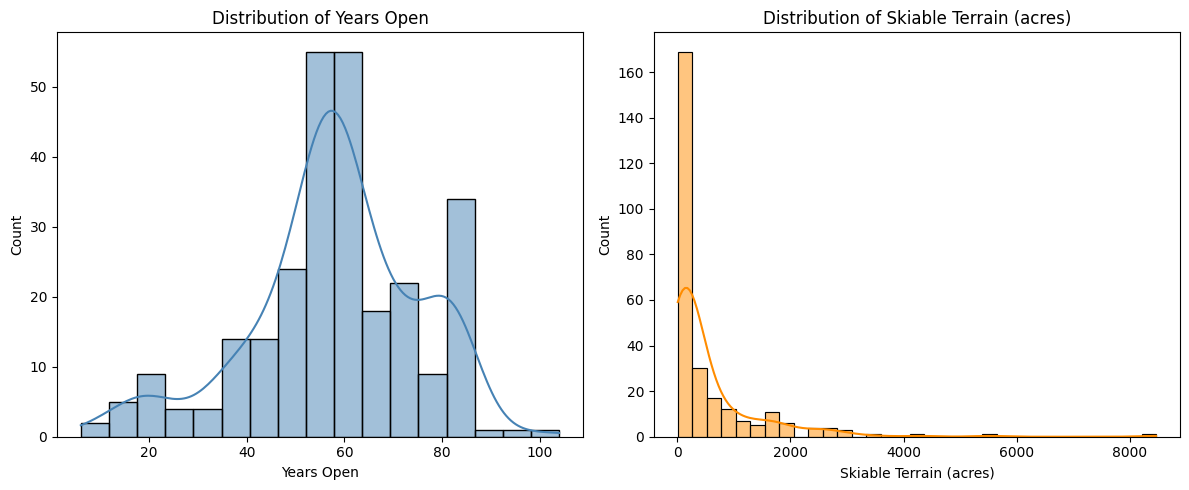

In [26]:
plt.figure(figsize=(12,5))

# yearsOpen
plt.subplot(1, 2, 1)
sns.histplot(df['yearsOpen'].dropna(), kde=True, color='steelblue')
plt.title('Distribution of Years Open')
plt.xlabel('Years Open')
plt.ylabel('Count')

# SkiableTerrain_ac
plt.subplot(1, 2, 2)
sns.histplot(df['SkiableTerrain_ac'].dropna(), kde=True, color='darkorange')
plt.title('Distribution of Skiable Terrain (acres)')
plt.xlabel('Skiable Terrain (acres)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Note:
Obvious incorrect values have been identified and corrected to ensure data accuracy.

## 2.7 Data Transformation<a id='2.7_Data_Transformation'></a>

In [27]:
df = df.rename(columns={
    'Name': 'name',
    'Region': 'region',
    'state': 'state',
    'summit_elev': 'summit_elevation_ft',
    'vertical_drop': 'vertical_drop_ft',
    'base_elev': 'base_elevation_ft',
    'trams': 'num_trams',
    'fastSixes': 'fast_six_lifts',
    'fastQuads': 'fast_quad_lifts',
    'quad': 'quad_lifts',
    'triple': 'triple_lifts',
    'double': 'double_lifts',
    'surface': 'surface_lifts',
    'total_chairs': 'total_chairs',
    'Runs': 'num_runs',
    'TerrainParks': 'terrain_parks',
    'LongestRun_mi': 'longest_run_mi',
    'SkiableTerrain_ac': 'skiable_terrain_acres',
    'Snow Making_ac': 'snow_making_acres',
    'daysOpenLastYear': 'days_open_last_year',
    'yearsOpen': 'years_open',
    'averageSnowfall': 'average_snowfall_in',
    'AdultWeekday': 'adult_weekday_price',
    'AdultWeekend': 'adult_weekend_price',
    'projectedDaysOpen': 'projected_days_open',
    'NightSkiing_ac': 'night_skiing_acres'
})

### Note:
Column names are standardized to lowercase with underscores for consistency and easier reference in Python. Units are appended (e.g., `_ft`, `_acres`, `_in`) where applicable.

In [28]:
df.head().T

,0,1,2,3,4
name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elevation_ft,3939,2600,2090,11500,11100
vertical_drop_ft,2500,1540,294,2300,1800
base_elevation_ft,250,1200,1796,9200,9200
num_trams,1,0,0,0,0
fast_six_lifts,0,0,0,1,0
fast_quad_lifts,2,0,0,0,1
quad_lifts,2,0,0,2,2


## 2.8 Summary<a id='2.8_Summary'></a>

In [29]:
missing_count = df.isna().sum().sum()
duplicate_count = df.duplicated().sum()

print("✅ Final Verification Report")
print("---------------------------")
print(f"Missing values found: {missing_count}")
print(f"Duplicate rows found: {duplicate_count}")
print(f"Data shape: {df.shape}")

✅ Final Verification Report
---------------------------
Missing values found: 0
Duplicate rows found: 0
Data shape: (272, 26)


In [30]:
output_path = "../data/processed/data_01_cleaned.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"✅ Cleaned data saved to {output_path}")

✅ Cleaned data saved to ../data/processed/data_01_cleaned.csv


### Note:
The cleaned dataset is verified to contain no missing values or duplicates and is saved for further analysis in the next notebook.